# Creating Bezier surfaces
# - using Matplotlib, NumPy and scikit-vectors

Copyright (c) 2017-2019 Tor Olav Kristensen, http://subcube.com

https://github.com/t-o-k/scikit-vectors

Use of this source code is governed by a BSD-license that can be found in the LICENSE file.

In [1]:
url = 'https://github.com/t-o-k/scikit-vectors_examples/'

In [2]:
# This example has been tested with NumPy v1.15.3, Matplotlib v2.1.1 and Jupyter v4.4.0

In [3]:
# Uncomment one of these to get a Matplotlib backend with interactive plots 

# %matplotlib auto
# %matplotlib notebook

In [4]:
import operator
from functools import reduce
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

from skvectors import create_class_Cartesian_3D_Vector

In [5]:
# Size and resolution for Matplotlib figures

figure_size = (8, 6)
figure_dpi = 100

In [6]:
class Bicubic_Bezier():

    blend_fns = \
        [
            lambda s: (1 - s)**3,
            lambda s: 3 * s * (1 - s)**2,
            lambda s: 3 * s**2 * (1 - s),
            lambda s: s**3
        ]

    @staticmethod
    def _sum(values):

        return reduce(operator.add, values)


    def __init__(self, points4x4):

        self.points4x4 = points4x4


    def __call__(self, u, v):

        return \
            self._sum(
                self.blend_fns[j](u) *
                self._sum(
                    self.blend_fns[i](v) * self.points4x4[i][j]
                    for i in range(4)
                )
                for j in range(4)
            )

In [7]:
np_functions = \
    {
        'not': np.logical_not,
        'and': np.logical_and,
        'or': np.logical_or,
        'all': np.all,
        'any': np.any,
        'min': np.minimum,
        'max': np.maximum,
        'abs': np.absolute,
        'int': np.rint,
        'ceil': np.ceil,
        'copysign': np.copysign,
        'log10': np.log10,
        'cos': np.cos,
        'sin': np.sin,
        'atan2': np.arctan2,
        'pi': np.pi
    }

In [8]:
control_grid_shape = (4, 4)

ControlGrid3D = \
    create_class_Cartesian_3D_Vector(
        name = 'ControlGrid3D',
        component_names = 'xyz',
        cnull = np.zeros(control_grid_shape),
        cunit = np.ones(control_grid_shape),
        functions = np_functions
    )

In [9]:
p3d_ctrl = \
    ControlGrid3D(
        x = \
            np.array(
                [
                    [  0.0,  1.0,  2.0,  3.0 ],
                    [  0.0,  1.0,  2.0,  4.0 ],
                    [  0.0,  1.0,  2.0,  2.5 ],
                    [  0.0,  1.0,  2.0,  3.0 ],
                ]
            ),
        y = \
            np.array(
                [
                    [  0.0,  0.0,  1.0,  0.0 ],
                    [  1.0,  1.0,  2.0,  1.0 ],
                    [  2.0,  2.0,  3.0,  2.0 ],
                    [  3.0,  3.0,  5.0,  3.0 ]
                ]
            ),
        z = \
            np.array(
                [
                    [  2.0,  0.0,  0.0, -3.0 ],
                    [ -2.0, -3.0, -2.0,  3.0 ],
                    [  0.0, -4.0,  0.0,  2.0 ],
                    [  2.0,  0.0,  0.0, -3.0 ]
                ]
            )
    )

In [10]:
surface_shape = nr_u, nr_v = (20, 30)

Surface3D = \
    create_class_Cartesian_3D_Vector(
        name = 'Surface3D',
        component_names = 'xyz',
        cnull = np.zeros(surface_shape),
        cunit = np.ones(surface_shape),
        functions = np_functions
    )

In [11]:
bb_x = Bicubic_Bezier(p3d_ctrl.x)
bb_y = Bicubic_Bezier(p3d_ctrl.y)
bb_z = Bicubic_Bezier(p3d_ctrl.z)

In [12]:
u, v = \
    np.meshgrid(
        np.arange(0, nr_v) / (nr_v - 1),
        np.arange(0, nr_u) / (nr_u - 1)
    )

bezier_points = \
    Surface3D(
        x = bb_x(u, v),
        y = bb_y(u, v),
        z = bb_z(u, v)
    )

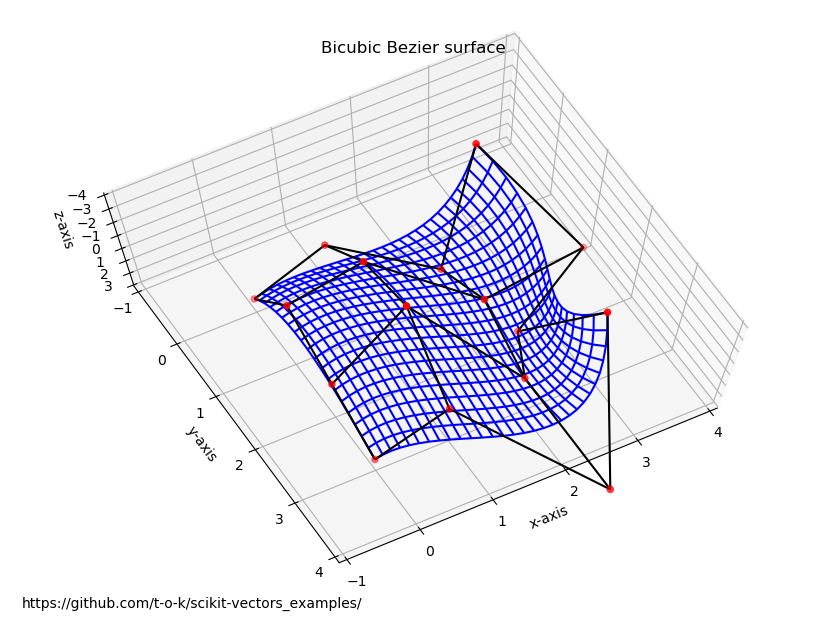

In [13]:
fig = plt.figure(figsize=figure_size, dpi=figure_dpi)
fig.text(0.01, 0.01, url)
ax = Axes3D(fig)
ax.set_title('Bicubic Bezier surface')
ax.plot_wireframe(*p3d_ctrl, color='black')
ax.scatter(p3d_ctrl.x, p3d_ctrl.y, p3d_ctrl.z, c='r', marker='o')
ax.plot_wireframe(bezier_points.x, bezier_points.y, bezier_points.z, color='blue')
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
ax.set_xlim(-1, +4)
ax.set_ylim(-1, +4)
ax.set_zlim(-4, +3)
ax.view_init(elev=-105, azim=-61)
plt.show()

In [14]:
# Select colors for the faces

def select_color(i, j):

    if (i + j) % 2 == 0:
        color = 'navy'
    elif j % 2 == 0:
        color = 'lightseagreen'
    else:
        color = 'deeppink'

    return color


face_colors = \
    [
        [
            select_color(i, j)
            for j in range(nr_v-1)
        ]
        for i in range(nr_u-1)
    ]

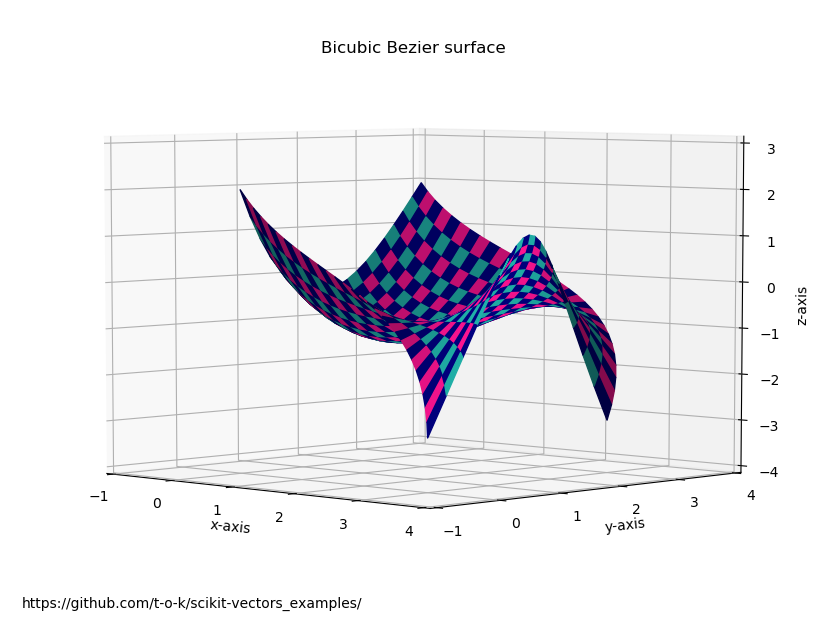

In [15]:
fig = plt.figure(figsize=figure_size, dpi=figure_dpi)
fig.text(0.01, 0.01, url)
ax = Axes3D(fig)
ax.set_title('Bicubic Bezier surface')
ax.plot_surface(
    bezier_points.x, bezier_points.y, bezier_points.z,
    rstride = 1, cstride = 1,
    facecolors = face_colors,
    # cmap = plt.cm.inferno,
    # shade = False
)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
ax.set_xlim(-1, +4)
ax.set_ylim(-1, +4)
ax.set_zlim(-4, +3)
ax.view_init(elev=5, azim=-46)
plt.show()

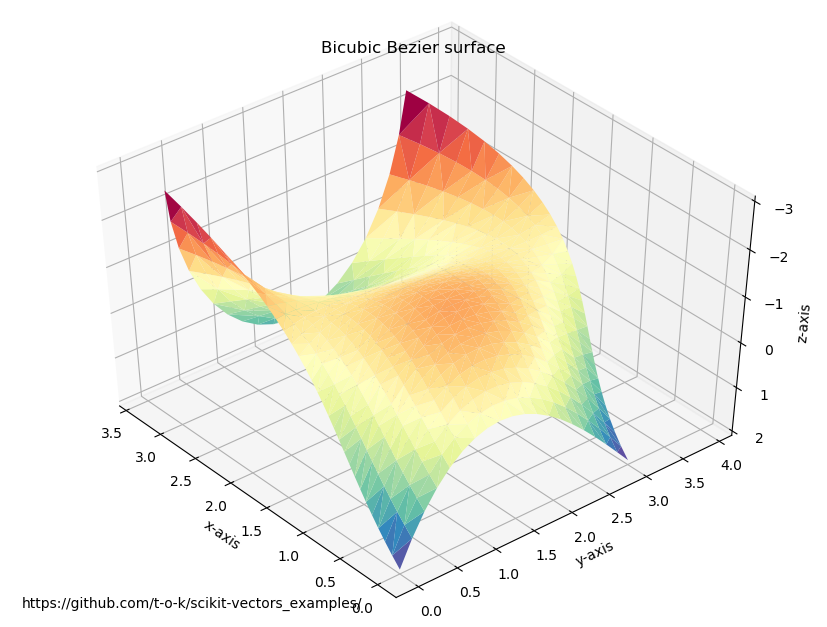

In [16]:
tri = \
    mtri.Triangulation(
        u.flatten(),
        v.flatten()
    )

fig = plt.figure(figsize=figure_size, dpi=figure_dpi)
fig.text(0.01, 0.01, url)
ax = Axes3D(fig)
ax.set_title('Bicubic Bezier surface')
ax.plot_trisurf(
    bezier_points.x.flatten(),
    bezier_points.y.flatten(),
    bezier_points.z.flatten(),
    triangles = tri.triangles,
    cmap = plt.cm.Spectral
)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
ax.view_init(elev=-135, azim=40)
plt.show()

In [17]:
p3d_ctrl = \
    ControlGrid3D(
        x = \
            np.array(
                [
                    [  1.0,  2.0,  2.0,  1.0 ],
                    [  2.0,  0.5,  0.5,  2.0 ],
                    [  2.0,  0.5,  0.5,  2.0 ],
                    [  1.0,  2.0,  2.0,  1.0 ]
                ]
            ),
        y = \
            np.array(
                [
                    [ -1.0, -2.0, -2.0, -1.0 ],
                    [ -0.5, -0.5, -0.5, -0.5 ],
                    [  0.5,  0.5,  0.5,  0.5 ],
                    [  1.0,  2.0,  2.0,  1.0 ]
                ]
            ),
        z = \
            np.array(
                [
                    [ -1.0, -0.5,  0.5,  1.0 ],
                    [ -2.0, -0.5,  0.5,  2.0 ],
                    [ -2.0, -0.5,  0.5,  2.0 ],
                    [ -1.0, -0.5,  0.5,  1.0 ],
                ]
            )
    )

In [18]:
bb_x = Bicubic_Bezier(p3d_ctrl.x)
bb_y = Bicubic_Bezier(p3d_ctrl.y)
bb_z = Bicubic_Bezier(p3d_ctrl.z)

vxp = +Surface3D.basis_x()
vxn = -Surface3D.basis_x()
vyp = +Surface3D.basis_y()
vyn = -Surface3D.basis_y()
vzp = +Surface3D.basis_z()
vzn = -Surface3D.basis_z()

bezier_points_xp = \
    Surface3D(
        x = bb_x(u, v),
        y = bb_y(u, v),
        z = bb_z(u, v)
    )

bezier_points_yp = bezier_points_xp.reorient(vxp, vyp)
bezier_points_yn = bezier_points_xp.reorient(vxp, vyn)
bezier_points_zp = bezier_points_xp.reorient(vxp, vzp)
bezier_points_zn = bezier_points_xp.reorient(vxp, vzn)
bezier_points_xn = bezier_points_yp.reorient(vyp, vxn)

bezier_surfaces = \
    [
        bezier_points_xp,
        bezier_points_xn,
        bezier_points_yp,
        bezier_points_yn,
        bezier_points_zp,
        bezier_points_zn
    ]

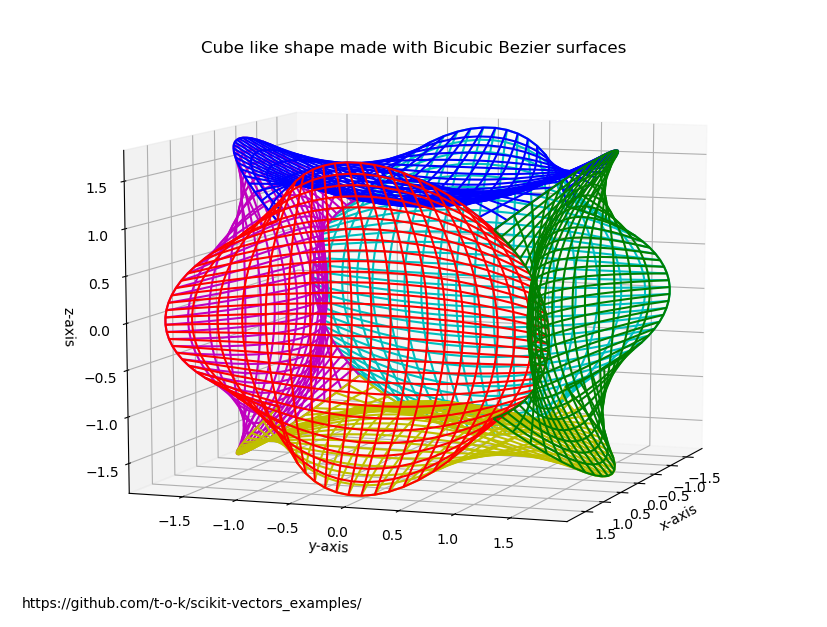

In [19]:
fig = plt.figure(figsize=figure_size, dpi=figure_dpi)
fig.text(0.01, 0.01, url)
ax = Axes3D(fig)
ax.set_title('Cube like shape made with Bicubic Bezier surfaces')
for surface, color in zip(bezier_surfaces, 'rcgmby'):
    ax.plot_wireframe(*surface, color=color)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
# ax.set_xlim(-1, +5)
# ax.set_ylim(-4, +3)
# ax.set_zlim(-1, +4)
ax.view_init(elev=10, azim=20)
plt.show()

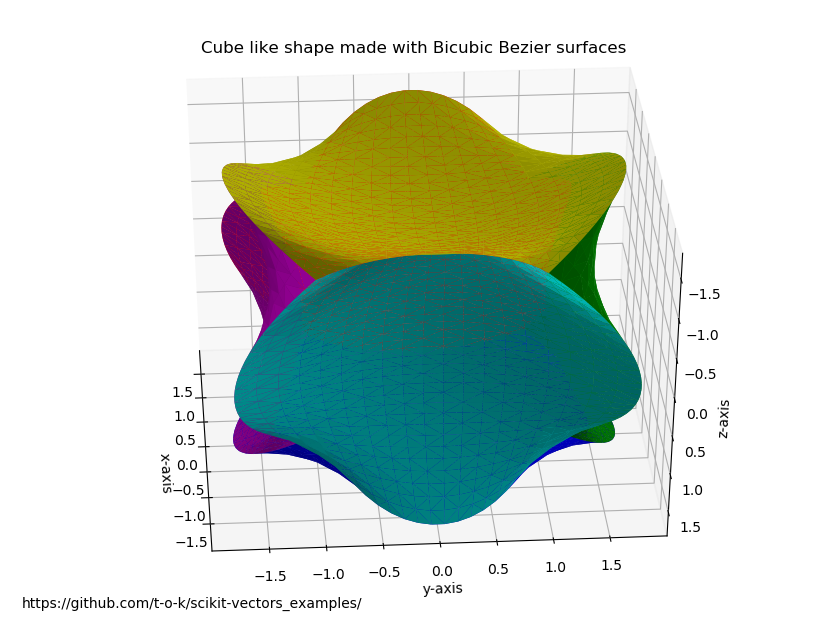

In [20]:
tri = \
    mtri.Triangulation(
        u.flatten(),
        v.flatten()
    )

fig = plt.figure(figsize=figure_size, dpi=figure_dpi)
fig.text(0.01, 0.01, url)
ax = Axes3D(fig)
ax.set_title('Cube like shape made with Bicubic Bezier surfaces')
for surface, color in zip(bezier_surfaces, 'rcgmby'):
    ax.plot_trisurf(
        *surface(np.ndarray.flatten),
        triangles = tri.triangles,
        color = color
    )
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
ax.view_init(elev=-145, azim=4)
plt.show()